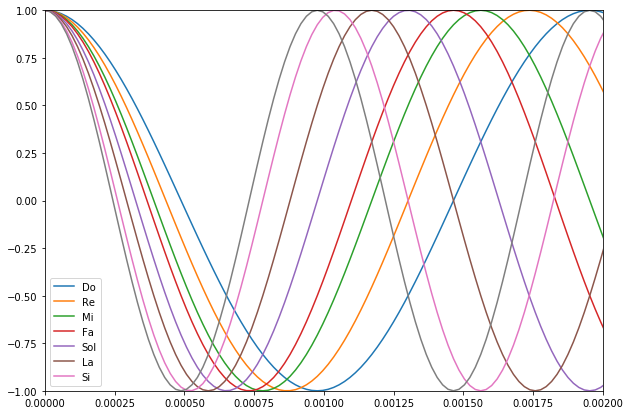

In [2]:
import numpy as np           #importando as bibliotecas necessárias:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wv
import os

                             # Parâmetros da onda:
tf = 1                       # Tempo de duração da nota
fc = 512                     # Frequência da nota Dó
fs = 100*fc                  # Frequencia de amostragem da nota.
t =np.arange(0,tf+1/fs,1/fs) # Vetor tempo. Para cada elemento do vetor t, haverá um elemento em y correspondente.
A = 1                        # Amplitude do sinal

TomFreq = [1, 9/8, 5/4, 4/3, 3/2, 5/3, 15/8, 2 ]  # Do = 1, Re = 2, Mi = 3, Fa = 4, Sol = 5, La = 6, Si = 7

plt.figure(1,figsize=[10,7]) # cria instância da figura para poder alterar seu tamanho
for notas in TomFreq :
    y=A*np.cos(2*(notas)*np.pi*fc*t)     # Sinal senoidal
    plt.plot(t,y)                # Visualizar o sinal gerado
    plt.axis([0,0.002,-1,1])      # Zoom para melhor visualização
plt.legend(['Do','Re','Mi','Fa','Sol','La','Si'])
plt.show()

#


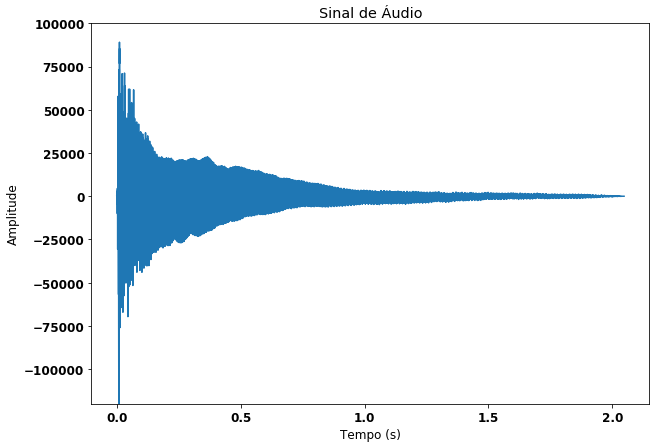

In [16]:

import numpy as np
import scipy.io.wavfile as wv
import os
import matplotlib.pyplot as plt

soundFile = './sound_01.wav'               # Especifica do local e nome do arquivo de áudio
dFa,vtSom = wv.read(soundFile)             # Abre arquivo de áudio de um arquivo
# vtSom: amplitude das amostras de som
# dFa: frequência de amostrasgem do som (amostragem no tempo)
vtSom = 4.0*vtSom
vtSomint16 = vtSom.astype('int16')                               #converte de float64 para int16 para reduzir ruído
wv.write('./4xsound_01.wav',dFa,vtSomint16)#salva amomstra de som para ser reproduzida
#reproduz a amostra de som salva
os.system('cvlc --play-and-exit ./4xsound_01.wav')
dta = 1/dFa                                                      # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                                     # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)                            # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
font = {'family' : 'DejaVu Sans','weight' : 'bold','size': 12}   #Configura a fonte do título
plt.rc('font', **font)
plt.plot(vtTSom,vtSom)                                           # Plota gráfico do áudio
plt.title('Sinal de Áudio')                                      # Configura título do gráfico
plt.ylabel('Amplitude')                                          # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                                          # Configura eixo Y do gráfico
plt.ylim([-120000,100000])                                       # Configura eixo Y do gráfico

plt.show()


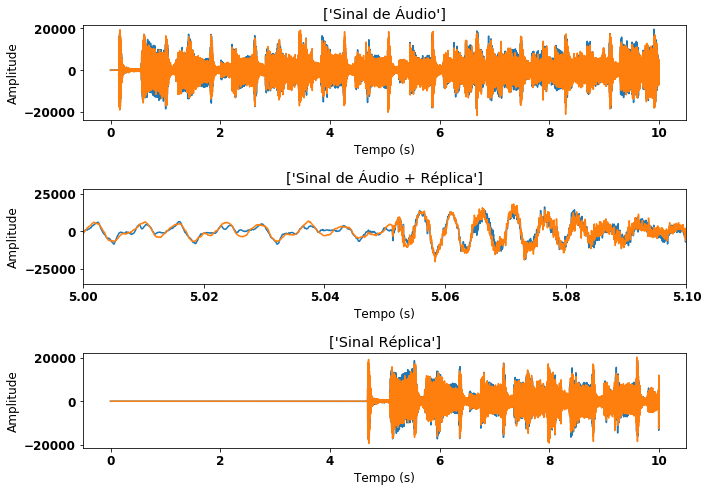

In [54]:
import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt

soundFile = './sound_02.wav' # Especifica do local e nome do arquivo de áudio
dFa,vtSom = wv.read(soundFile)                     # Abre arquivo
tf = 10                                            # Tempo que deseja tocar o arquivo
amostrasTf = int(np.ceil(tf*dFa))                  # Número de amostras para o tempo especificado
vtSom = vtSom[0:amostrasTf,:]                      # Considera somente as amostras para o tempo especificado
dta = 1/dFa                                        # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                       # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)              # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
plt.subplot(311)
plt.plot(vtTSom,vtSom)                             # Plota gráfico do áudio
plt.title(['Sinal de Áudio'])                      # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

wv.write('./sem_eco.wav',dFa,vtSom)
#os.system('cvlc --play-and-exit ./sem_eco.wav') 

## Modifica o arquivo incluindo eco (uma réplica atrasada do sinal oirginal)
n = 200000                                          # Atraso da réplica do sinal                                                          
eco = np.zeros([len(vtSom),2])
end=len(vtSom)
eco[n:,:] = vtSom[0:end-n,:] 
vtSomEco = np.zeros([len(eco),2])
vtSomEco += eco
vtSomEco += vtSom

wv.write('./com_eco.wav',dFa,vtSomEco.astype('int16'))
#os.system('cvlc --play-and-exit ./com_eco.wav') 

plt.subplot(312)                                # Segundo gráfico do subplot

plt.xlim(5,5.1)
plt.plot(vtTSom,vtSomEco)                          # Plota gráfico do áudio
plt.title(['Sinal de Áudio + Réplica'])            # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')    


plt.subplot(3,1,3)                                # Terceiro gráfico do subplot
plt.plot(vtTSom,vtSom-vtSomEco)                    # Plota gráfico do áudio
plt.title(['Sinal Réplica'])                       # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

plt.tight_layout()

plt.show()